In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [41]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [42]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [43]:
import statistics
statistics.mode(ages)

32

<Axes: >

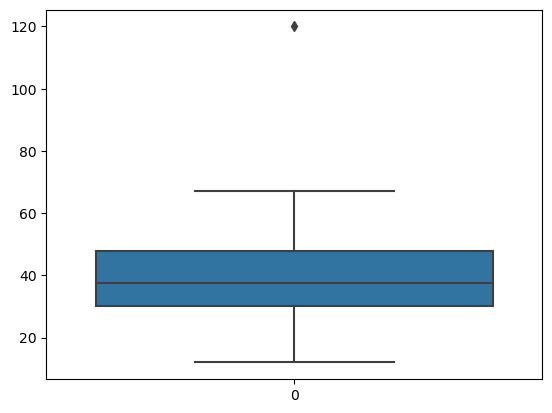

In [5]:
import seaborn as sns
sns.boxplot(ages)

## 5 Number Summary

In [6]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [7]:
print(q1,q3)

30.0 47.75


In [44]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [45]:
statistics.variance(ages)

795.2954545454545

In [46]:
np.var(ages,axis=0)

729.0208333333334

In [11]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [12]:
variance(ages)

795.2954545454545

In [47]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [14]:
variance(ages,dof=1)

795.2954545454545

In [15]:
statistics.pvariance(ages)

729.0208333333334

In [16]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

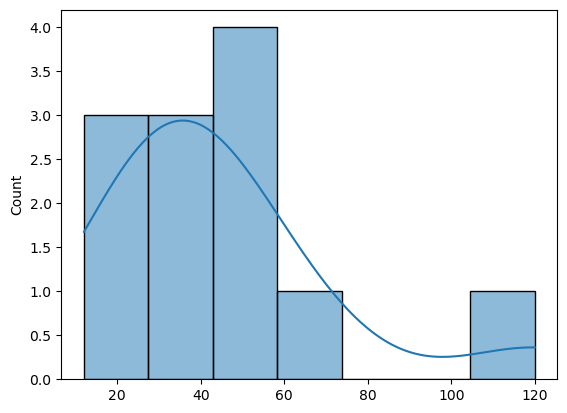

In [17]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [48]:
df=sns.load_dataset('iris')

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

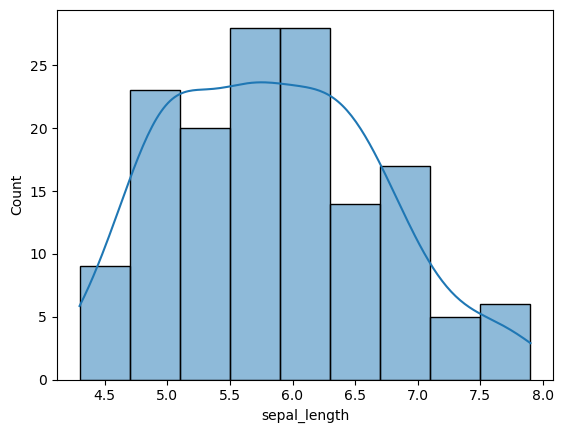

In [20]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

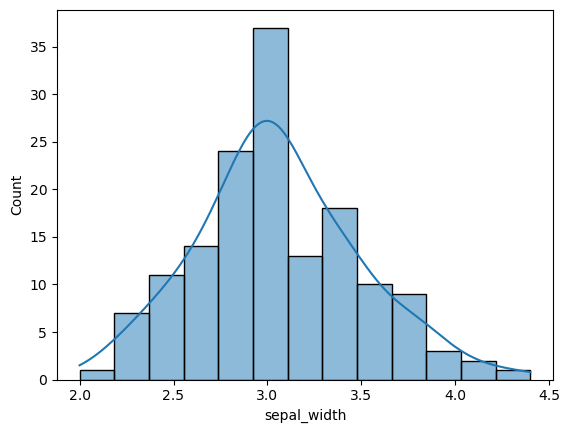

In [21]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

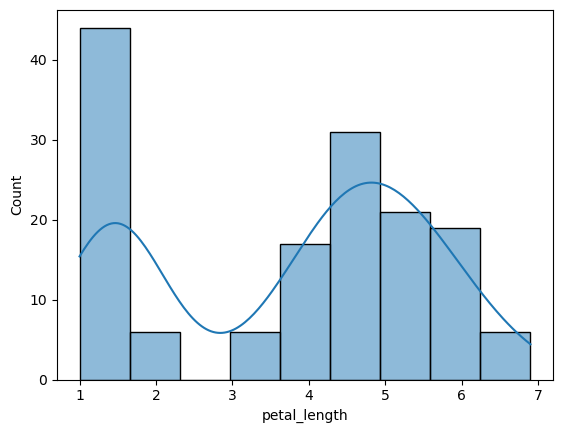

In [50]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

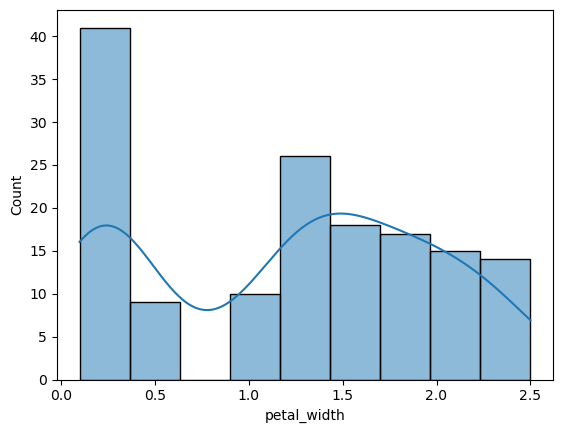

In [23]:
sns.histplot(df['petal_width'],kde=True)

In [51]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [25]:
s

array([ 0.81407446,  0.83707958,  0.6383144 ,  0.5055862 ,  0.40241973,
        0.44668158,  0.52793231,  0.44879765,  1.1190726 ,  0.61757024,
        0.47209614,  0.30471138,  0.71830091,  0.38127495,  0.50912798,
        0.53380068,  0.73376893,  0.63562611,  0.63020295,  0.76876082,
        0.70659517,  0.68282786,  0.67990964,  0.52549009,  0.499387  ,
        0.14852977,  0.78558578,  0.68295827,  0.6242821 ,  0.78018172,
        0.58713135,  0.69068784,  0.45817376,  0.56856428,  0.62036934,
        0.49556351,  0.31606774,  0.2364628 ,  0.5497969 ,  0.80723233,
        0.12616658,  0.30455116,  0.66059475,  0.46444769,  0.55190639,
        0.39430636,  0.71401154,  0.32725367,  0.52173036,  0.57754002,
        0.49035208,  0.70141707,  0.79349042,  0.12805172,  0.33498919,
        0.74928475,  0.5121674 ,  0.89178914,  0.78788629,  0.39899689,
        0.48507568,  0.38106673,  0.6824681 ,  0.19510191,  0.44562635,
        0.576248  ,  0.34049686,  0.34789144,  0.17198471,  0.48

<Axes: ylabel='Count'>

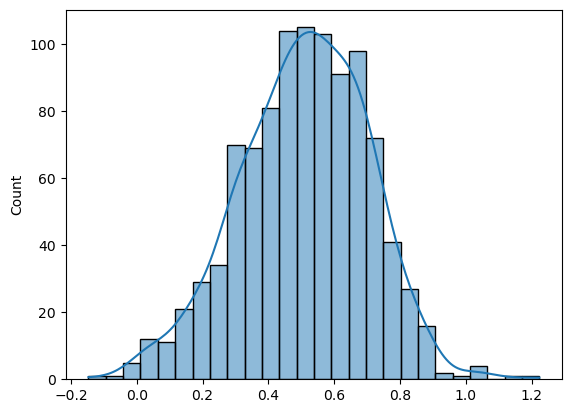

In [26]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [53]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

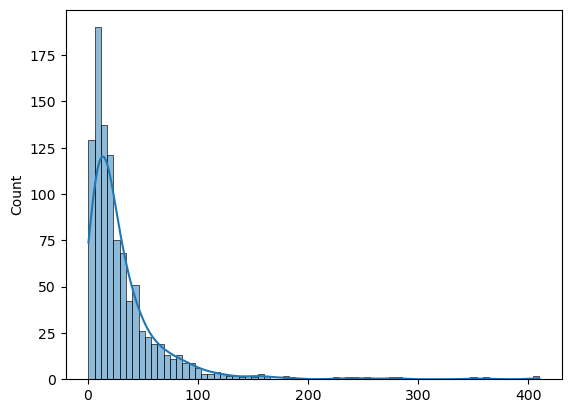

In [54]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

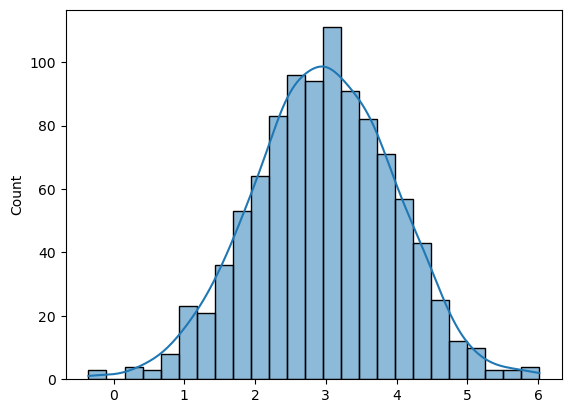

In [55]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

In [30]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


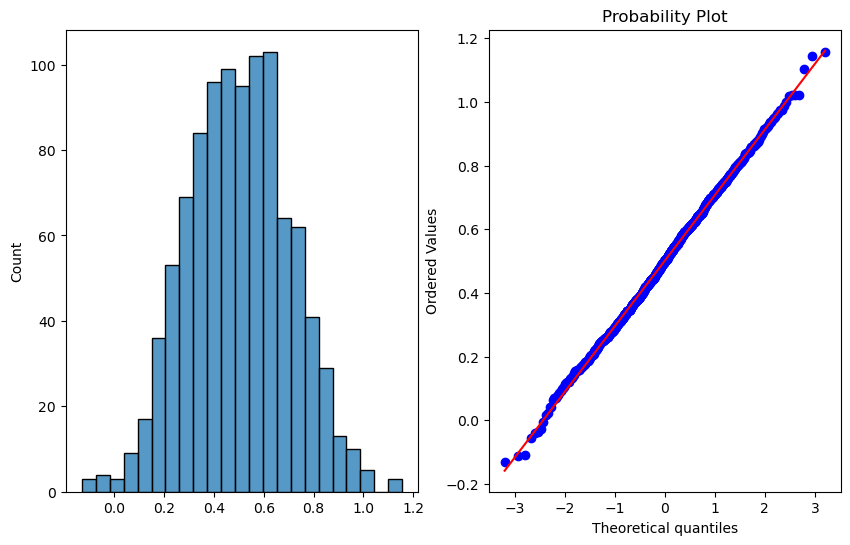

In [31]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

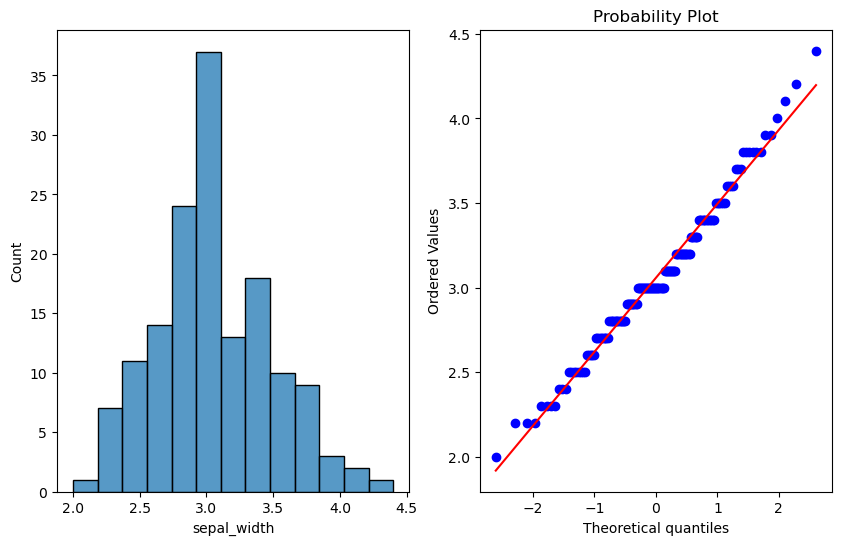

In [56]:
plot_data(df['sepal_width'])

In [33]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [34]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

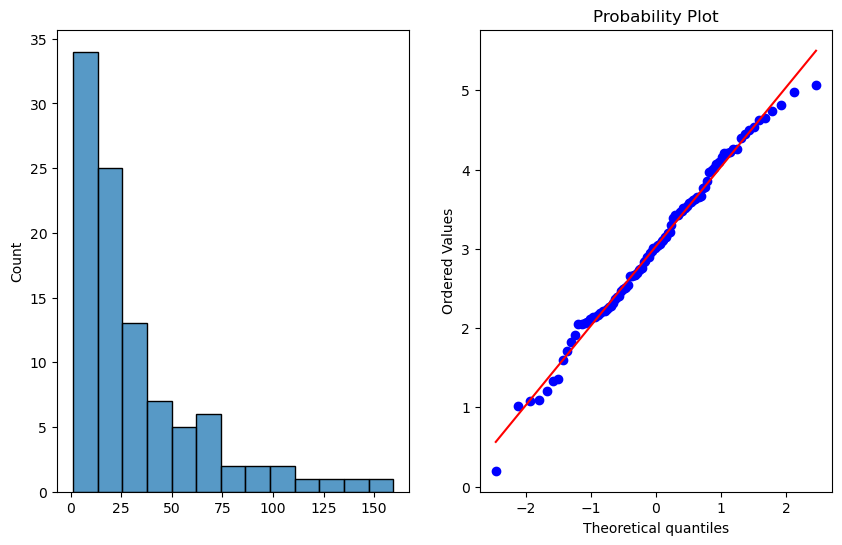

In [35]:
plot_data_log(sample)

##Pearson and Sperman Rank Correlation

In [36]:
df=sns.load_dataset('tips')

In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
import pandas as pd

In [39]:
df.corr()

C:\Users\SAJID\AppData\Local\Temp\ipykernel_10868\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


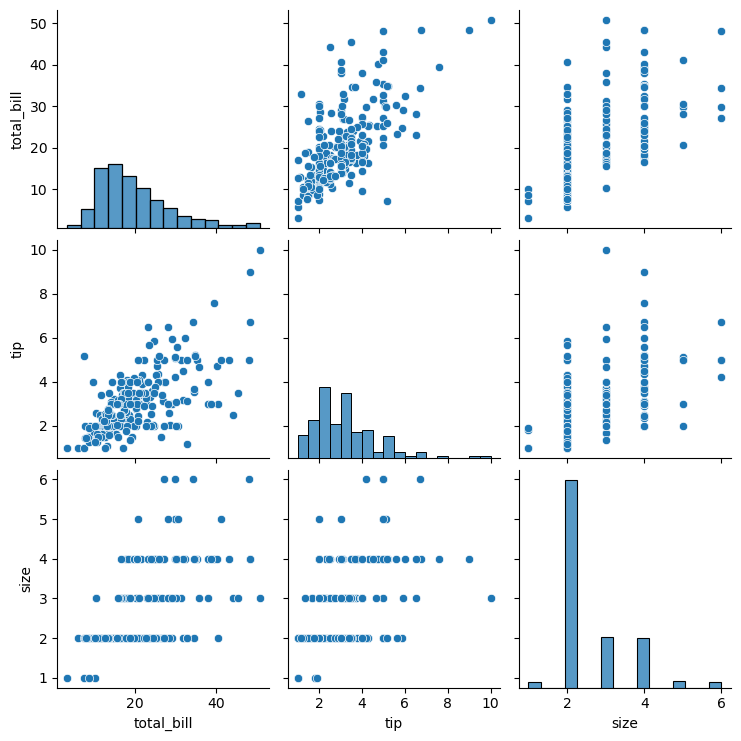

In [40]:
sns.pairplot(df)